In [1]:
import numpy as np

import matplotlib.pyplot as plt

from simnn.activations import *
from simnn.costs import *
from simnn.layers import *
from simnn.model import *
from simnn.utils import *

from dataset.bin_mnist_35.load_bin_mnist_35 import load_data

In [2]:
# load data
train_fnames = ['dataset/bin_mnist_35/new_train3.txt', 'dataset/bin_mnist_35/new_train5.txt']
X_train, Y_train = load_data(train_fnames)
# create one hot vectors for each label
Y_t = np.zeros(Y_train.shape, dtype=int); Y_t[np.where(Y_train == 5.)] = 1
Y_train = one_hot(Y_t)

# create dataset
dataset = (X_train, Y_train)

In [9]:
# define model structure
layers = [Linear(out_shape=100, activation=ReLU()),
          Linear(out_shape=50, activation=ReLU()),
          Linear(out_shape=2, activation=Softmax())]
# layers = [Linear(out_shape=2, activation=Softmax())]

# instantiate model
model = Model(layers, dataset, CrossEntropy(), class_task=True)

# fit model to data
z, costs, err_rate = model.fit(dataset, 5000, nu=1e-5, prnt=False)

Model, in_shape: 64, out_shape: 2, 
with layers:
Linear Layer, in_shape: 64, out_shape: 100, with bias: False, and activation: ReLU
Linear Layer, in_shape: 100, out_shape: 50, with bias: False, and activation: ReLU
Linear Layer, in_shape: 50, out_shape: 2, with bias: False, and activation: Softmax, n_stable: True
and cost: CrossEntropyCost

Final cost: 30.82557065010637
Final error rate: 0.002142857142857143


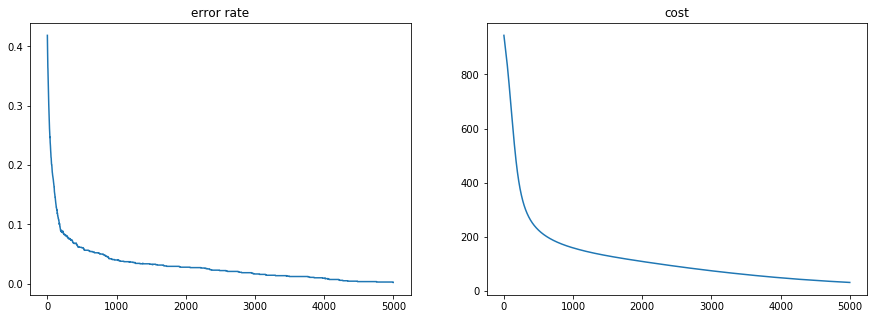

A classic example of overfitting


In [10]:
print(model)

print('Final cost: {}'.format(costs[-1]))
print('Final error rate: {}'.format(err_rate[-1]))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(err_rate)
ax1.set_title('error rate')
ax2.plot(costs)
ax2.set_title('cost')
plt.show()

print('A classic example of overfitting')